# c1

In [39]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
#%jsroot on

## Import files and names

In [40]:
f1 = ROOT.TFile("/users/PCON0003/cond0068/ARA/AraRoot/analysis/calpul_box/A2_c1_757842Events_DistroCalPulses_Pol0_CP6_forFit.root")
vpol=f1.Get("Colz_Vpol")


## <font color='red'>No calpulser 5</font> 

## Calpulser 6

## Let's get the plots first

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


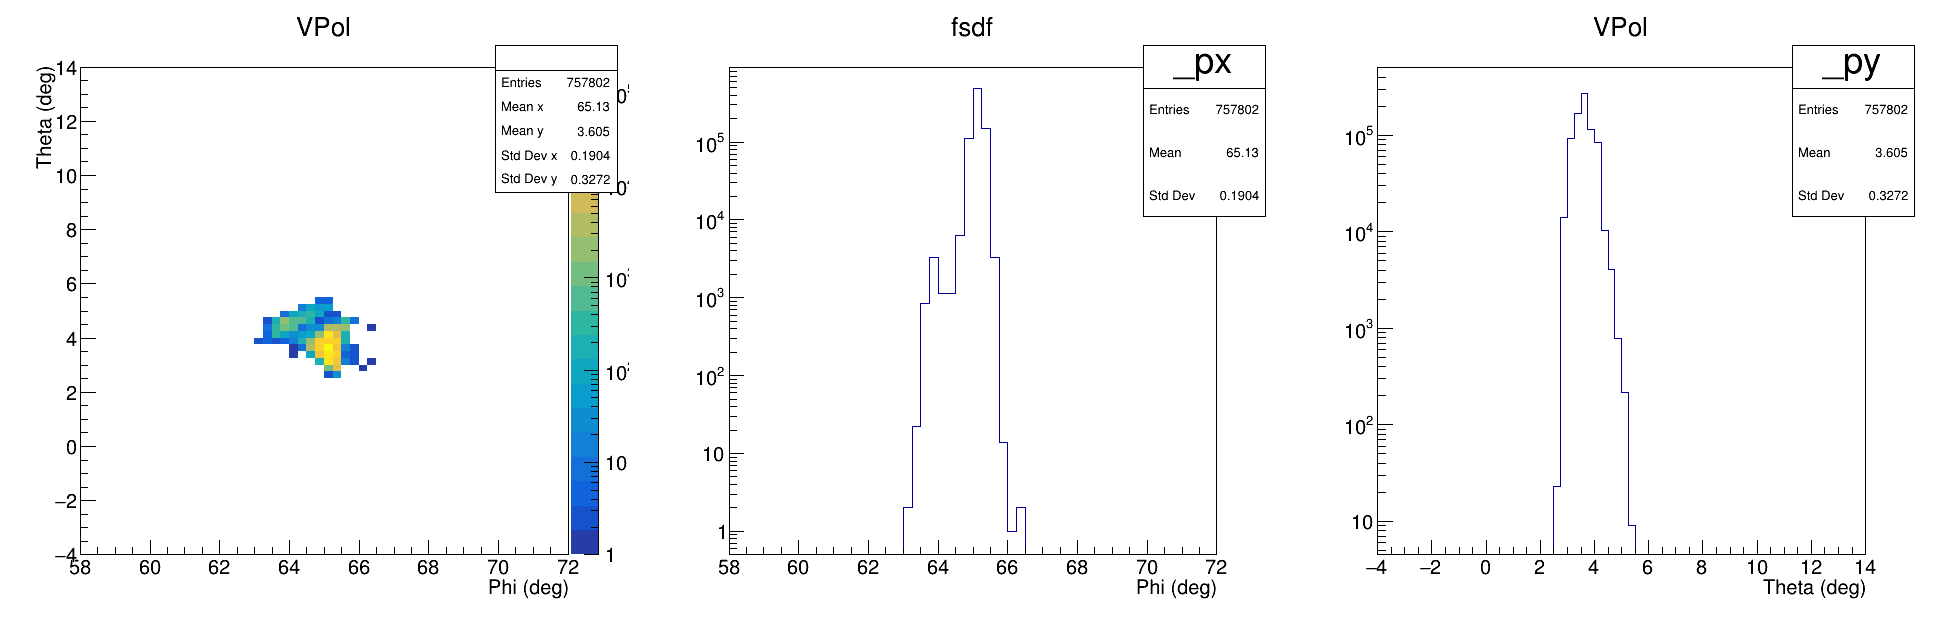

In [41]:
title_phi=str("fsdf")
c=ROOT.TCanvas("","",650*3,650)
c.Divide(3,1)
c.cd(1)
vpol.Draw("COLZ")
gPad.SetLogz()
c.cd(2)
phi_proj_gaus=vpol.ProjectionX()
phi_proj_gaus.Draw()
phi_proj_gaus.SetTitle(title_phi)
gPad.SetLogy()
c.cd(3)
theta_proj_gaus=vpol.ProjectionY()
theta_proj_gaus.Draw()
gPad.SetLogy()
c.Draw()

## Fit the distros

In [42]:
phi_proj=vpol.ProjectionX()
theta_proj=vpol.ProjectionY()


j1 = ROOT.TF1("n1","gaus",2,5)
j2 = ROOT.TF1("n2","gaus",5,8)
#j3 = ROOT.TF1("n2","gaus",5,8)

#phi.Fit("gaus","S")
total_th = ROOT.TF1("nstotal","gaus(0)+gaus(3)",0,9)
total_th.SetLineColor(4)
theta_proj.Fit(j1,"0R");
theta_proj.Fit(j2,"0RQ+");
#theta_proj.Fit(j3,"0RQ+");
mean_th=np.zeros(6)
for i in range(0,3):
    mean_th[i]=j1.GetParameter(i)
for i in range(3,6):
    mean_th[i]=j2.GetParameter(i-3)
# for i in range(6,9):
#     mean_th[i]=j3.GetParameter(i-6)
total_th.SetParameters(mean_th);
allfit_theta=theta_proj.Fit(total_th,"ESRLQ+")

g1 = ROOT.TF1("m1","gaus",63,64)
g2 = ROOT.TF1("m2","gaus",64,70)
#g3 = ROOT.TF1("m2","gaus",62,65)

#The total is the sum of the three, each has 3 parameters
total = ROOT.TF1("mstotal","gaus(0)+gaus(3)",60,70)
total.SetLineColor(4)
phi_proj.Fit(g1,"0R");
phi_proj.Fit(g2,"0RQ+");
#phi_proj.Fit(g3,"0RQ+");

mean=np.zeros(6)
for i in range(0,3):
    mean[i]=g1.GetParameter(i)
for i in range(3,6):
    mean[i]=g2.GetParameter(i-3)
# for i in range(6,9):
#     mean[i]=g3.GetParameter(i-6)
total.SetParameters(mean);
allfit=phi_proj.Fit(total,"ERLQS+")


 FCN=68557.9 FROM MIGRAD    STATUS=CONVERGED      97 CALLS          98 TOTAL
                     EDM=2.32767e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.47254e+05   3.48212e+02   1.49058e+00  -3.16835e-08
   2  Mean         3.60242e+00   4.31500e-04  -2.35184e-06   4.63946e-02
   3  Sigma        2.77938e-01   2.02164e-04  -1.50963e-06   3.07884e-01
 FCN=1.87739 FROM MIGRAD    STATUS=CONVERGED     166 CALLS         167 TOTAL
                     EDM=1.19378e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.37932e+03   8.92607e+01   4.32881e-02  -8.52871e-06
   2  Mean         6.39048e+01   1.73058e-02   3.04722e-05   3.61956e-02
   3  Sigma        1

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


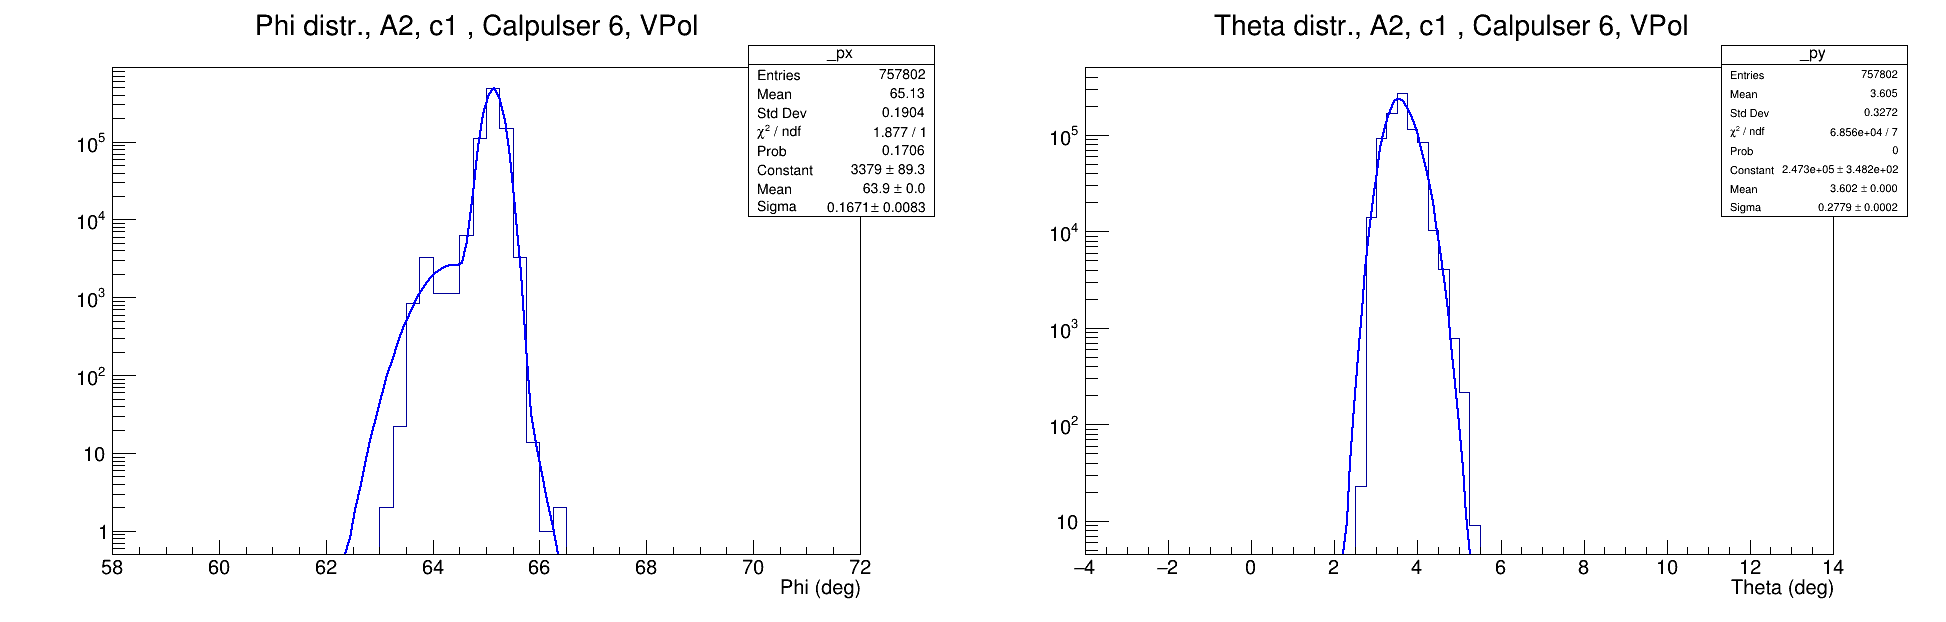

In [46]:
c=ROOT.TCanvas("","",650*3,650)
phi_int=total.Integral(-27,-21)
th_int=total_th.Integral(-30,-18)
name_ph="Phi Projection Near peak, Integral="+ str(phi_int)
name_th="Theta Projection Near peak, Integral="+ str(th_int)
c.Divide(2,1)

c.cd(1)
phi_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
phi_proj_gaus.SetTitle("Phi distr., A2, c1 , Calpulser 6, VPol")
c.cd(2)
theta_proj_gaus.SetTitle("Theta distr., A2, c1 , Calpulser 6, VPol")
theta_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
c.Draw()